In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [ ]:
IMGAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 1

In [3]:
dataset = keras.preprocessing.image_dataset_from_directory(
    "train_images",
    shuffle = True,
    image_size = (IMGAGE_SIZE, IMGAGE_SIZE),
    batch_size = BATCH_SIZE,
)


Found 10407 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


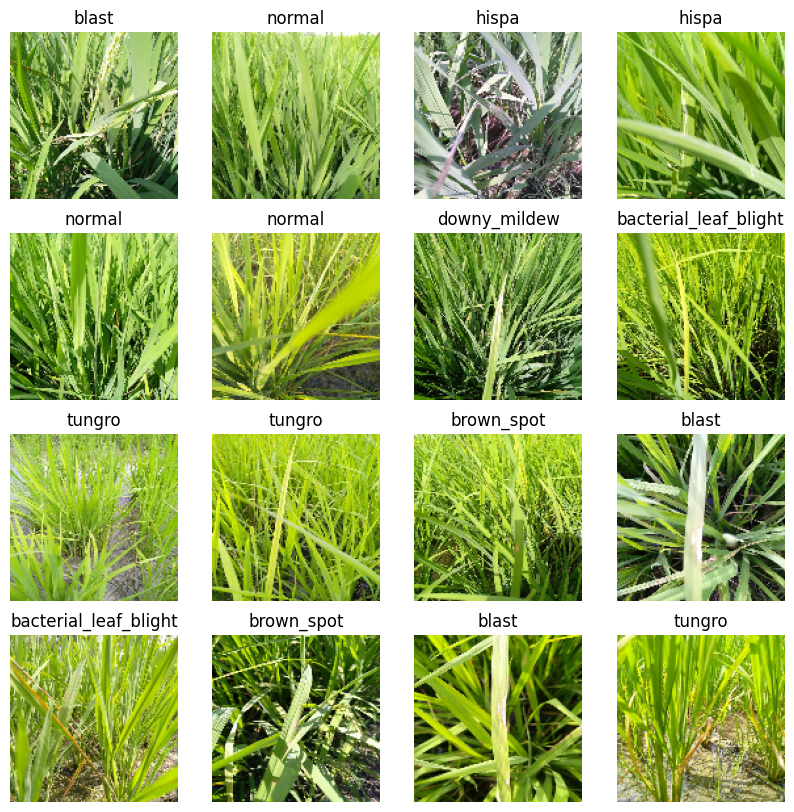

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    plt.show()

In [6]:
len(dataset)

326

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split = 0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    val_size = int(val_split * len(ds))
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    return train_ds, val_ds, test_ds

In [8]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(train_ds), len(val_ds), len(test_ds)

(260, 32, 34)

In [9]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMGAGE_SIZE, IMGAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [12]:
input_shape = (BATCH_SIZE,IMGAGE_SIZE, IMGAGE_SIZE, CHANNELS)
n_classes = 10
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])
model.build(input_shape=input_shape)
model.summary()

c:\Users\dungt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 126, 126, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 63, 63, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 61, 61, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,274 (575.29 KB)

 Trainable params: 147,274 (575.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.1930 - loss: 2.1546 - val_accuracy: 0.2539 - val_loss: 1.9606
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.3299 - loss: 1.8903 - val_accuracy: 0.3887 - val_loss: 1.7498
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.3782 - loss: 1.7698 - val_accuracy: 0.4111 - val_loss: 1.6644
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.4179 - loss: 1.6661 - val_accuracy: 0.4209 - val_loss: 1.6229
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step - accuracy: 0.4423 - loss: 1.6090 - val_accuracy: 0.4297 - val_loss: 1.6361
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - accuracy: 0.4621 - loss: 1.5539 - val_accuracy: 0.4062 - val_loss: 1.6715
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4819 - loss: 1.5007 - val_accuracy: 0.4565 - val_loss: 1.5632
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.4826 - loss: 1.4731 -

In [15]:
from keras.applications.resnet50 import ResNet50

In [16]:
IMGAGE_SIZE_RN = 224
resnet_base = ResNet50(
    input_shape=(IMGAGE_SIZE, IMGAGE_SIZE, 3),
    include_top=False,
    weights=None  
)

In [17]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (32, 4, 4, 2048)       │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (32, 2048)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 128)              │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 23,798,154 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [19]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/2
260/260 ━━━━━━━━━━━━━━━━━━━━ 233s 885ms/step - accuracy: 0.3607 - loss: 1.8039 - val_accuracy: 0.3457 - val_loss: 2.4158
Epoch 2/2
260/260 ━━━━━━━━━━━━━━━━━━━━ 213s 808ms/step - accuracy: 0.4155 - loss: 1.6602 - val_accuracy: 0.3477 - val_loss: 1.9323
